In [28]:
print('Hello World')

Hello World


In [0]:
#For Python



**This is a markdown cell, not a code cell**

---


<br>
Almost all Jupyter type notebooks allow for both inline.<br>
If you make a change in an upper cell. The lower cells will not be aware of those changes, unless you re-run the upper cells.<br>

Python does not use semicolons for statement delimiters<br>
Python uses spaces instead of curly braces for block scoping<br><br>
Python is a core language but is very reliant on third party libraries for ML.<br>
Most commonly used 3rd Party libraries are:<br>
* Numpy - Arrays (can be multidimensional) 
* Pandas - DataFrame 2d data table object 
* os - OS
* matplotlib - Plotting
* seaport - Plotting
* scikit-learn - Machine Learning

for speed, you can import specific classes of large libraries. 
You will see us do that with scikit-learn<br><br>
*One confusing thing for me about Jupyter Cells* <br>
'Enter' creates a new line. <br>
'Shift'-'Enter' moves out of the line and runs it. <br>
The opposite of spreadsheets

In [0]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import os

%matplotlib inline

In [31]:
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/ML2TestFinalData4-18-2020.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/.metricsUUID
/content/.config/logs/2020.04.03/16.24.26.990500.log
/content/.config/logs/2020.04.03/16.23.40.043713.log
/content/.config/logs/2020.04.03/16.24.13.655529.log
/content/.config/logs/2020.04.03/16.24.09.722063.log
/content/.config/logs/2020.04.03/16.24.26.483358.log
/content/.config/logs/2020.04.03/16.23.57.403439.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv


In [32]:
#LOAD OUR DATE 
#read in CSV File 
import pandas as pd
filename = "/content/ML2TestFinalData4-18-2020.csv"
df = pd.read_csv(filename)
df.head()

,NBHD,LIVEAREA,FINBSMNT,BASEMENT,CONDITION,CONDITION_ADJ,QUALITY,NOCARS,NUMBDRM,NUMBATHS,NETPRICE
0,715,2558,0,0,Good,1,B,0,2,3,1025000
1,711,3176,250,313,Good,1,B,5,4,3,852000
2,712,3179,1474,1972,AVG,0,B,2,4,4,730611
3,713,2291,2176,2291,Good,1,B,2,2,3,675000
4,713,2740,1020,1396,Good,1,B,2,3,4,655000


In [33]:
#REVIEW OUR DATA
df.shape

(285, 11)

In [34]:
df.isnull().any()

NBHD             False
LIVEAREA         False
FINBSMNT         False
BASEMENT         False
CONDITION        False
CONDITION_ADJ    False
QUALITY          False
NOCARS           False
NUMBDRM          False
NUMBATHS         False
NETPRICE         False
dtype: bool

In [35]:
#for Jared :) This is before we do any machine learning, so it may very well be that a column doesn't look important but is, in conjunction with another column
df.corr()

,NBHD,LIVEAREA,FINBSMNT,BASEMENT,CONDITION_ADJ,NOCARS,NUMBDRM,NUMBATHS,NETPRICE
NBHD,1.000000,0.061472,-0.211152,-0.296919,-0.086730,0.004377,0.254781,-0.047021,-0.127704
LIVEAREA,0.061472,1.000000,0.072939,0.231224,0.216803,0.350102,0.525849,0.592913,0.534935
FINBSMNT,-0.211152,0.072939,1.000000,0.755823,0.157817,0.482032,0.208100,0.569808,0.259089
BASEMENT,-0.296919,0.231224,0.755823,1.000000,0.034549,0.666091,0.306972,0.571467,0.315914
CONDITION_ADJ,-0.086730,0.216803,0.157817,0.034549,1.000000,0.049501,0.039391,0.191101,0.282759
NOCARS,0.004377,0.350102,0.482032,0.666091,0.049501,1.000000,0.643159,0.610915,0.218027
NUMBDRM,0.254781,0.525849,0.208100,0.306972,0.039391,0.643159,1.000000,0.544765,0.160514
NUMBATHS,-0.047021,0.592913,0.569808,0.571467,0.191101,0.610915,0.544765,1.000000,0.390439
NETPRICE,-0.127704,0.534935,0.259089,0.315914,0.282759,0.218027,0.160514,0.390439,1.000000


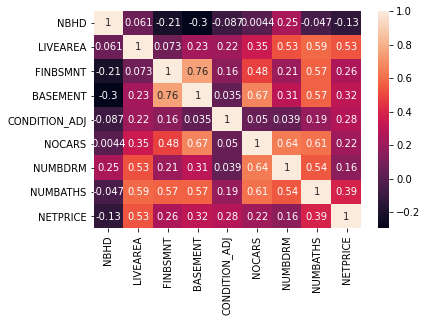

In [36]:
import seaborn as sn
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [0]:
#CREATE TEXT & TRAIN DATASETS
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['LIVEAREA','FINBSMNT','CONDITION_ADJ','NOCARS','BASEMENT','NUMBDRM','NUMBATHS'  ]
predicted_class_names = ['NETPRICE']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30 # test_size = 0.3 is 30%, 42 is the answer to everything

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                           

In [45]:
#How did our split go?
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.82% in training set
30.18% in test set


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
#SETUP AND RUN OUR LINEAR REGRESSION MODEL/ALGORITHM (FIT is another word for 'create model' )
lr_modelLR = LinearRegression()     
lr_modelLR.fit(X_train, y_train.ravel()) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#SCORE OUR NEW MODEL/ALGORITHM BASED ON TRAINING DATA - LINEAR REGRESSION
lr_predict_trainLR = lr_modelLR.predict(X_train)

rmse = mean_squared_error(y_train, lr_predict_trainLR)
r2 = r2_score(y_train, lr_predict_trainLR)


# training metrics
print('Slope:' ,lr_modelLR.coef_)
print('Intercept:', lr_modelLR.intercept_)

print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 1.45966758e+02  3.67160341e+01  4.19492238e+04 -2.85137968e+02
  2.74192221e+01 -2.47678446e+04 -1.66939870e+04]
Intercept: 108246.19529453997
Root mean squared error:  9468297997.37026
R2 score:  0.3600362989744892


In [49]:
#SETUP AND RUN OUR MODEL/ALGORITHM ON TEST DATA
from sklearn.ensemble import RandomForestRegressor
rf_modelRFTest = RandomForestRegressor(n_estimators = 100, random_state = 42)    # Instantiate model with 100 decision trees
rf_modelRFTest.fit(X_test, y_test.ravel()) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [52]:
#SCORE OUR NEW MODEL/ALGORITHM BASED ON TEST DATA
rf_predict_trainRFTest = rf_modelRFTest.predict(X_test)

rmseTest = mean_squared_error(y_test, rf_predict_trainRFTest)
r2Test = r2_score(y_test, rf_predict_trainRFTest)

print('Root mean squared error: ', rmseTest)
print('R2 score: ',r2Test)

Root mean squared error:  1920591172.067334
R2 score:  0.8412503749955057


Pretty good. <br>
How could we improve this R2?



